<a href="https://colab.research.google.com/github/vikiysr/mlprojects/blob/main/Loan%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings                        
warnings.filterwarnings("ignore")


Loading the Dataset

In [ ]:
train=pd.read_csv("/content/Loan_Status_train.csv")
test=pd.read_csv("/content/Loan_Status_test.csv")

Features and Dimensions of the dataset

In [ ]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
#test data is similar to train data except loan_status column

In [ ]:
train.shape,test.shape

((614, 13), (367, 12))

##Explaratory Data Analysis

In [ ]:
#first explore target feature
train.Loan_Status.value_counts(normalize=True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

In [74]:
#we have loan approval of 68% and rejection of 31%

In [ ]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#we have 5 categorical, 3 ordinal and 4 numerical features

Plotting the categorical features

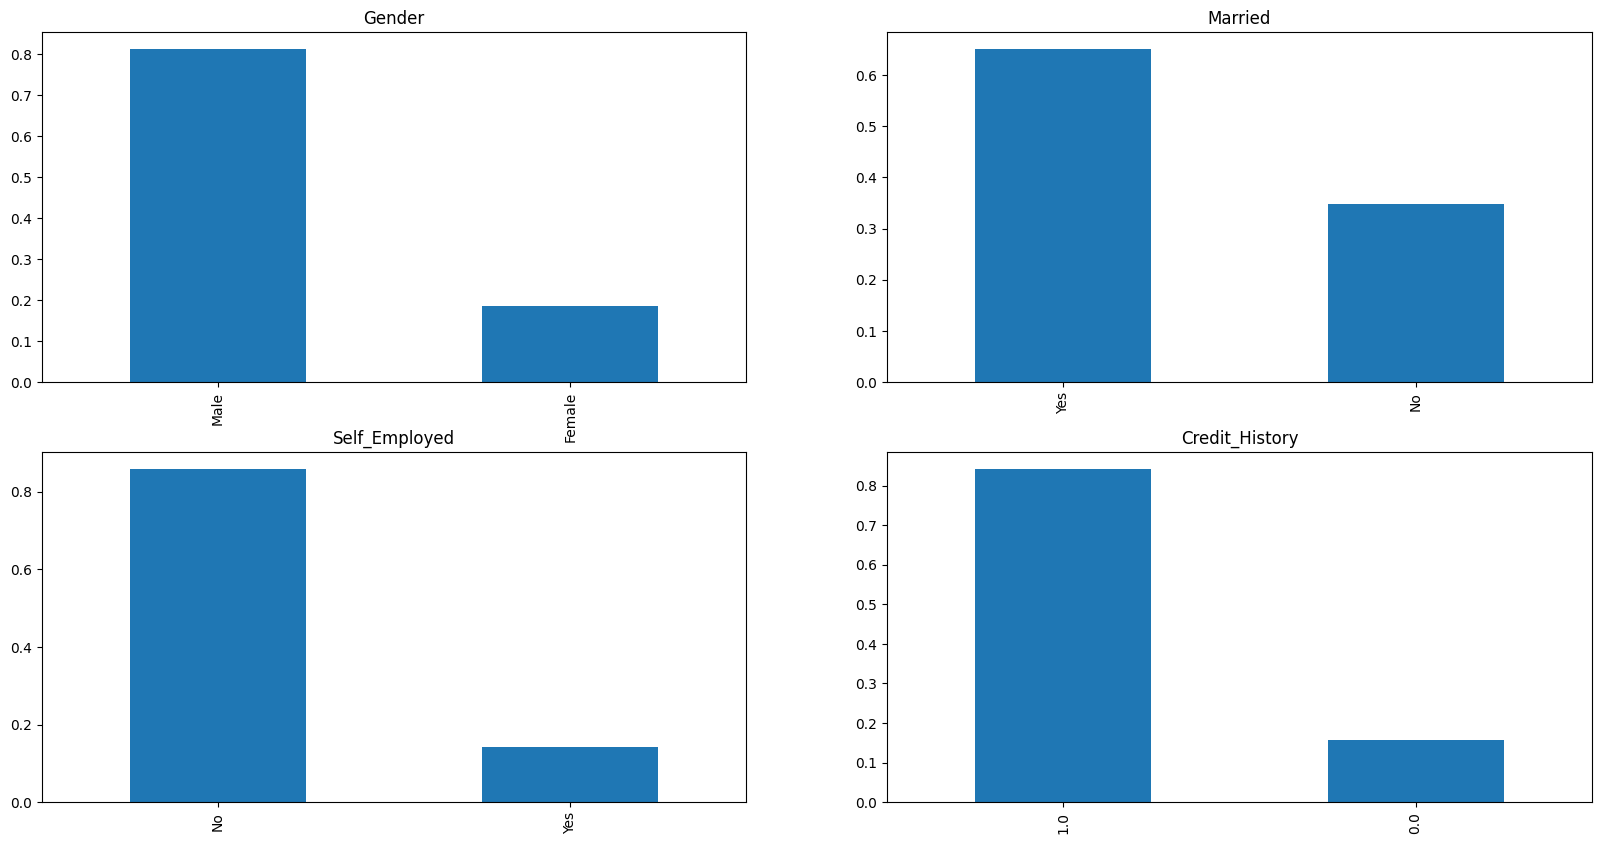

In [ ]:
plt.figure(1) 
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

In [ ]:
#from the plots we infere that 
#80% are male,
#70% are married,
#15% are self employed,
#85% have previous credit history

Plotting the ordinal feature variables

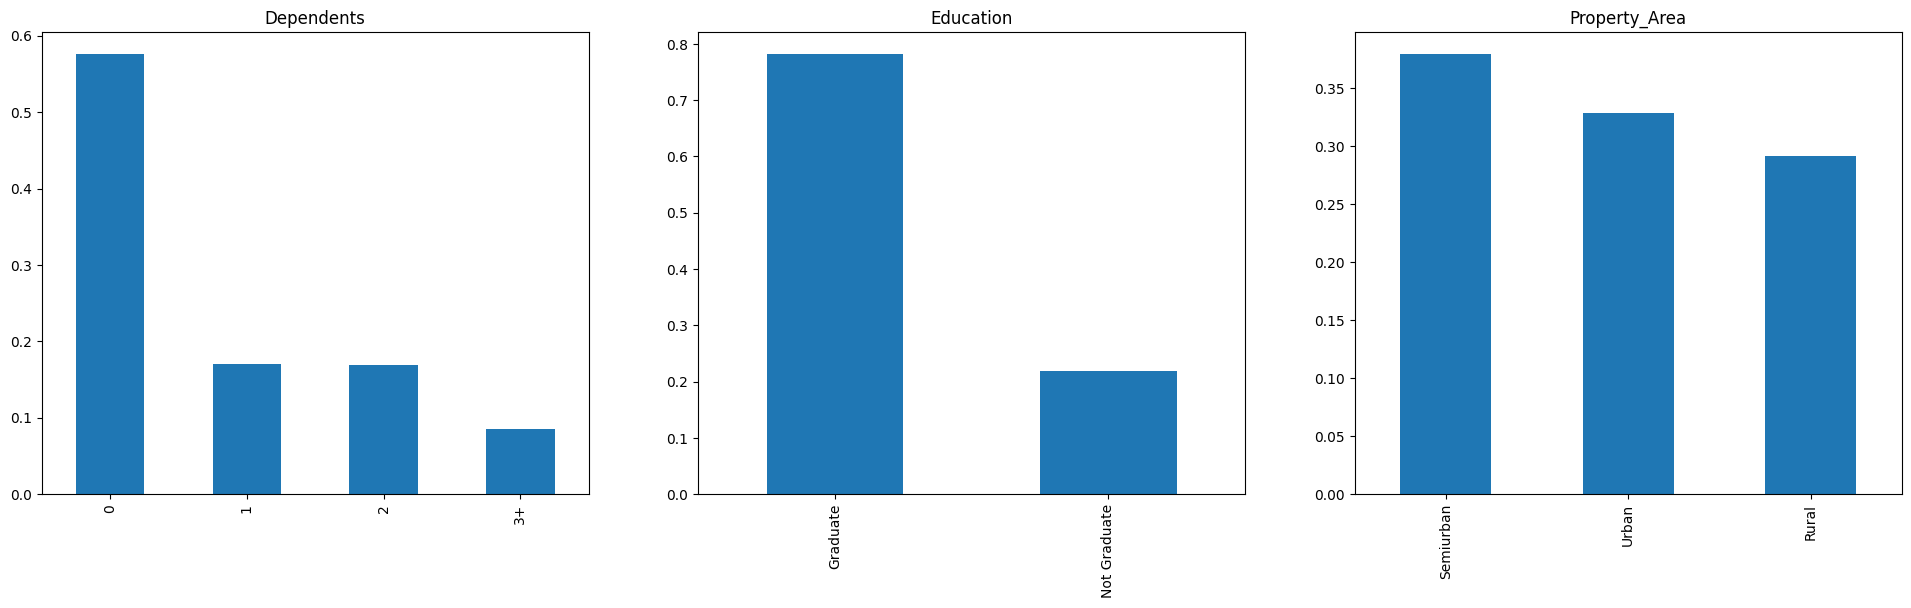

In [ ]:
plt.figure(1) 
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents') 
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

In [ ]:
#from the plots we infere that 
#50% don't have dependents
#75% are graduates
#40% are from semiurban areas

Plotting Numerical Values

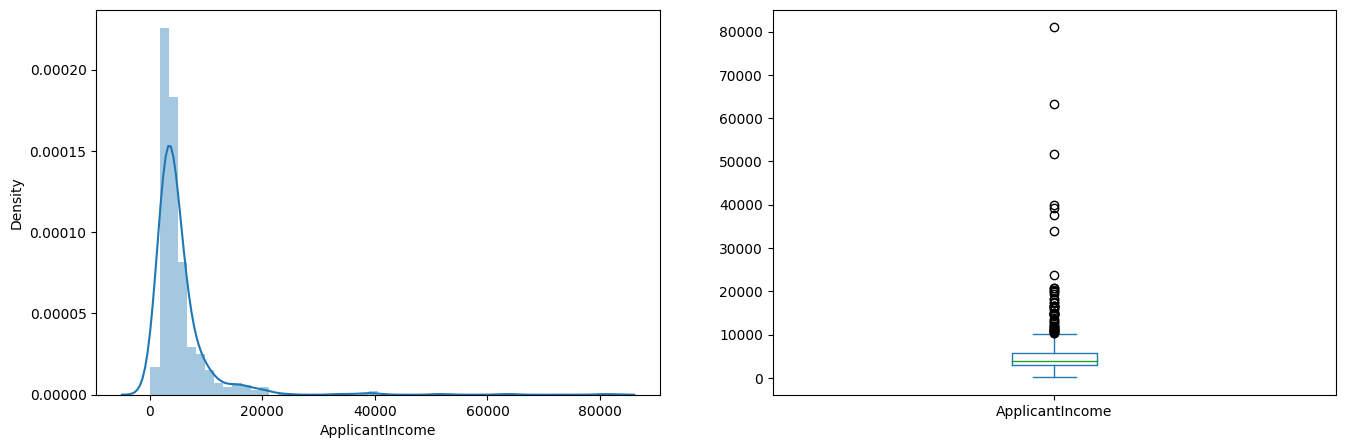

In [ ]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']); 
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

In [75]:
#The data is not normally distributed

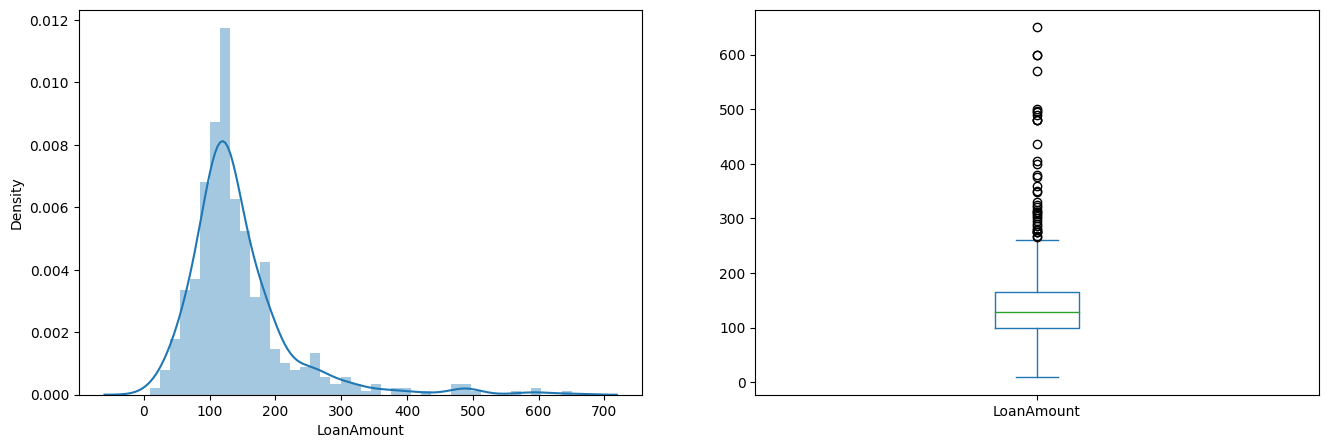

In [76]:
plt.figure(1) 
plt.subplot(121)
sns.distplot(train['LoanAmount']); 
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

In [77]:
#The distribution is almost normal but contains a lot of outliers

Independent variables vs Target variables

<Axes: xlabel='Gender'>

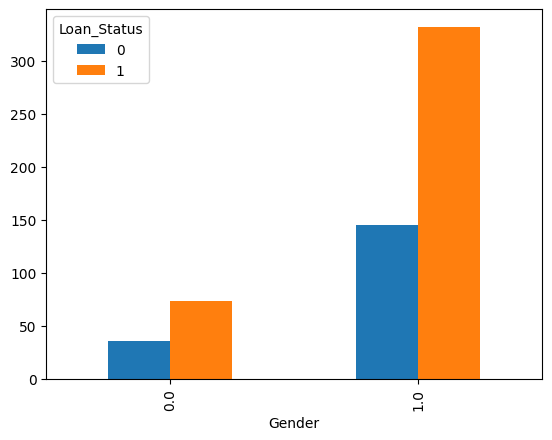

In [78]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender.plot(kind='bar')

<Axes: xlabel='Married'>

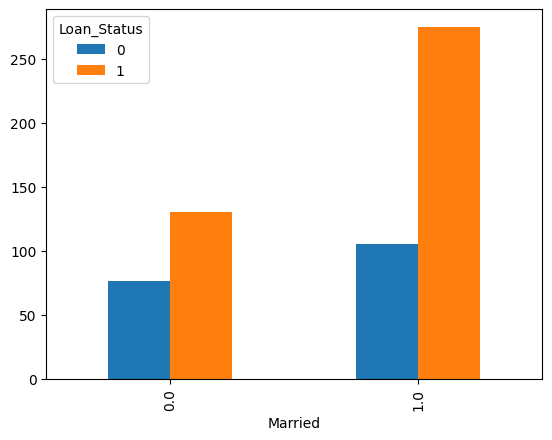

In [79]:
Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Married.plot(kind='bar')

<Axes: xlabel='Dependents'>

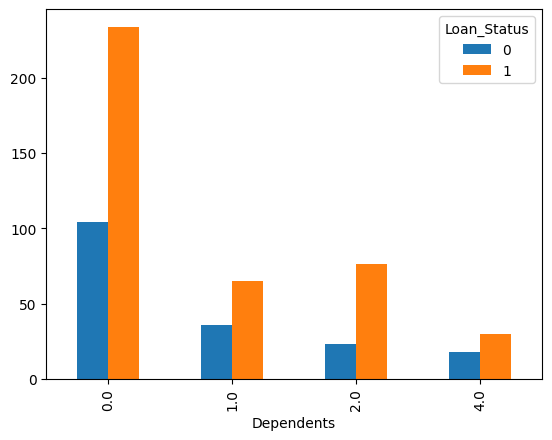

In [80]:
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.plot(kind="bar")

<Axes: xlabel='Education'>

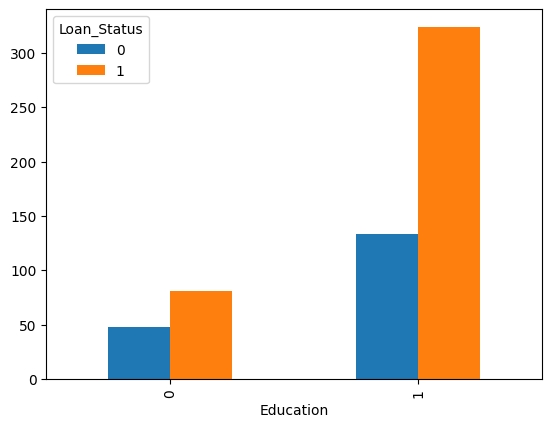

In [81]:
Education=pd.crosstab(train['Education'],train['Loan_Status']) 
Education.plot(kind="bar")
 

<Axes: xlabel='Self_Employed'>

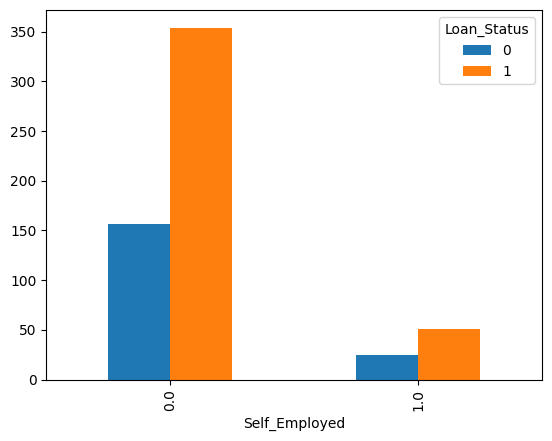

In [82]:
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.plot(kind="bar")

## Data Preprocessing



Label Encoding

In [ ]:
train.replace({"Gender":{"Male":1,"Female":0},"Married":{"Yes":1,"No":0},"Education":{"Graduate":1,"Not Graduate":0
                            },"Self_Employed":{"Yes":1,"No":0},"Property_Area":{"Urban":0,"Rural":1,"Semiurban":2},
                              "Loan_Status":{"Y":1,"N":0}},inplace=True)
train.replace({"Dependents":{"0":0,"1":1,"2":2,"3+":4}},inplace=True)

Checking the null values in features

In [ ]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Description about the dataset

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    float64
 2   Married            611 non-null    float64
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    int64  
 5   Self_Employed      582 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 62.5+ KB


Imputing the Null values of continous data with median value

In [ ]:
train["LoanAmount"].fillna(train["LoanAmount"].median(),inplace=True)

In [ ]:
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].median(),inplace=True)

Imputing the null values in categorical features with mode 

In [ ]:
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0],inplace=True)

In [ ]:
train["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)

Checking for null values

In [ ]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Since the nullvalues in the above features are small(less than 3% compared to total data), we drop it

In [ ]:
train.dropna(inplace=True)

In [ ]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Preview of Data set after cleaning the null values

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,128.0,360.0,1.0,0,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,0,1


Segregating the independent feature and dependent feature

In [ ]:
X=train.drop(columns=["Loan_ID","Loan_Status"])
y=train.Loan_Status

Standardization of feature values

In [ ]:
X.std()

Gender                  0.389445
Married                 0.477858
Dependents              1.207950
Education               0.414693
Self_Employed           0.336252
ApplicantIncome      5852.248540
CoapplicantIncome    2975.456308
LoanAmount             81.927483
Loan_Amount_Term       64.514228
Credit_History          0.345431
Property_Area           0.838767
dtype: float64

In [ ]:
scaler=StandardScaler()
scaler.fit(X)
standardized_train=scaler.transform(X)

In [ ]:
standardized_train.std()

0.9999999999999999

In [ ]:
X=standardized_train

In [ ]:
y=train.Loan_Status

In [ ]:
X.shape

(586, 11)

Splitting the data into train and test splits

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)

Preparing the model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=3)

Fitting the model

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=3)

Predicting the output of training data

In [ ]:
y_trainpreds=model.predict(X_train)

Checking the performance of model with accuracy score

In [ ]:

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_train,y_trainpreds)

In [ ]:
print(accuracy*100)

95.08547008547008


Fitting the model on test data

In [ ]:
model.fit(X_test,y_test)

RandomForestClassifier(n_estimators=3)

Predicting the outcome of test data

In [ ]:
y_testpreds=model.predict(X_test)

Finding the accuracy of the model on test data

In [ ]:
accuracy_test=accuracy_score(y_testpreds,y_test)

In [ ]:
print(accuracy_test*100)

93.22033898305084


Loading the validation dataset

In [ ]:
test=pd.read_csv("/content/Loan_Status_test.csv")

Preview of dataset

In [ ]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


Dimensions of the dataset

In [ ]:
test.shape

(367, 12)

Description about the dataset

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


Statistical Measures of the dataset

In [ ]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


Label Encoding

In [ ]:
test.replace({"Gender":{"Male":1,"Female":0},"Married":{"Yes":1,"No":0},"Education":{"Graduate":1,"Not Graduate":0
                            },"Self_Employed":{"Yes":1,"No":0},"Property_Area":{"Urban":0,"Rural":1,"Semiurban":2}
                              },inplace=True)

In [ ]:
test.replace({"Dependents":{"0":0,"1":1,"2":2,"3+":4}},inplace=True)

Imputing the Null values with mean and mode

In [ ]:
test["LoanAmount"].fillna(test["LoanAmount"].mean(),inplace=True)

In [ ]:
test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mean(),inplace=True)

In [ ]:
test["Self_Employed"].fillna(test["Self_Employed"].mode()[0],inplace=True)

In [ ]:
test["Credit_History"].fillna(test["Credit_History"].mode()[0],inplace=True)

In [ ]:
test.dropna(inplace=True)

Setting the independent features to predict the output

In [ ]:
X2=test.drop(columns=["Loan_ID"])

Predicting the output

In [ ]:
y_validation=model.predict(X2)

Setting Labels for binary datas in the predicted output

In [ ]:
test["predicted_output"]=y_validation
test.predicted_output.replace({0:"No",1:"Yes"},inplace=True)

In [ ]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,predicted_output
0,LP001015,1.0,1,0.0,1,0.0,5720,0,110.0,360.0,1.0,0,No
1,LP001022,1.0,1,1.0,1,0.0,3076,1500,126.0,360.0,1.0,0,No
2,LP001031,1.0,1,2.0,1,0.0,5000,1800,208.0,360.0,1.0,0,No
3,LP001035,1.0,1,2.0,1,0.0,2340,2546,100.0,360.0,1.0,0,No
4,LP001051,1.0,0,0.0,0,0.0,3276,0,78.0,360.0,1.0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1.0,1,4.0,0,1.0,4009,1777,113.0,360.0,1.0,0,No
363,LP002975,1.0,1,0.0,1,0.0,4158,709,115.0,360.0,1.0,0,No
364,LP002980,1.0,0,0.0,1,0.0,3250,1993,126.0,360.0,1.0,2,No
365,LP002986,1.0,1,0.0,1,0.0,5000,2393,158.0,360.0,1.0,1,No
